In [149]:
# trace_plotting.py
# Avery Krieger 11/2022, adapted components from Tim Currier and Max Turner

# argumenmts: [1] date (yyyy-mm-dd); [2] series_number; [3] roi_set_name
# implementation: save_strfs.py 2022-03-17 1 roi_set_postfrom visanalysis.analysis import imaging_data, shared_analysis

import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from two_photon_analysis import medulla_analysis as ma
from visanalysis.analysis import imaging_data, shared_analysis
from scipy.stats import sem
import pandas as pd
import seaborn as sns

In [28]:
def intensityToInd(ID, filtered_indicies, polarity, silent = True):
    current_intensities = ID.getEpochParameters('current_intensity')
    current_len = np.array(current_intensities).shape
    current_len = int(np.squeeze(current_len))
    true_ind = []
    if polarity == 1:
        for ind in range(current_len):
            #current_intensities[ind]

            if current_intensities[ind] > 0:
                true_ind.append(ind)
        
    elif polarity == 0:
        for ind in range(current_len):
            if current_intensities[ind] < 1:
               true_ind.append(ind) 
    else: 
        print('polarity value fucked up')
    if silent == False:
        print(f'True Ind:\n{true_ind}')
        print(f'filtered_ind Ind:\n{filtered_indicies}')
    
    #make sure that this works even if filtered smaller
    diffs = sum(true_ind - filtered_indicies)

    if diffs == 0:
        print('intensityToInd says: Filtered Indicies are CORRECT!')
        #return True
    else:
        print('intensityToInd says: Filtered Indicies are INCORRECT!')
        #return False

def newFilterTrials(epoch_response, ID, query, return_inds=False):
    epoch_trial_count = epoch_response.shape[1]
    matching_trials = np.where([shared_analysis.matchQuery(ep, query) for ep in ID.getEpochParameters()[0:epoch_trial_count]])[0]

    if return_inds:
        return epoch_response[:, matching_trials, :], matching_trials
    else:
        return epoch_response[:, matching_trials, :]

In [29]:
# AstA addition experiments
# Fly 1 (motion corrected)
fly1_exp1_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-moco", "2022-12-06", "1", "proximal"]]
fly1_exp2_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-moco", "2022-12-06", "2", "proximal"]]
fly1_exp3_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-moco", "2022-12-06", "3", "proximal"]]
fly1_exp4_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-moco", "2022-12-06", "4", "proximal"]]
fly1_expts_prox = np.concatenate(
    (fly1_exp1_prox, fly1_exp2_prox, fly1_exp3_prox, fly1_exp4_prox), axis = 0,
)
fly1_exp1_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-moco", "2022-12-06", "1", "medial"]]
fly1_exp2_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-moco", "2022-12-06", "2", "medial"]]
fly1_exp3_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-moco", "2022-12-06", "3", "medial"]]
fly1_exp4_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-moco", "2022-12-06", "4", "medial"]]
fly1_expts_medi = np.concatenate(
    (fly1_exp1_medi, fly1_exp2_medi, fly1_exp3_medi, fly1_exp4_medi), axis = 0,
)
fly1_exp1_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-moco", "2022-12-06", "1", "distal"]]
fly1_exp2_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-moco", "2022-12-06", "2", "distal"]]
fly1_exp3_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-moco", "2022-12-06", "3", "distal"]]
fly1_exp4_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-moco", "2022-12-06", "4", "distal"]]
fly1_expts_dist = np.concatenate(
    (fly1_exp1_dist, fly1_exp2_dist, fly1_exp3_dist, fly1_exp4_dist), axis = 0,
)

# Fly 2
fly2_exp1_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221206", "2022-12-06", "5", "proximal"]]
fly2_exp2_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221206", "2022-12-06", "6", "proximal"]]
fly2_exp3_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221206", "2022-12-06", "7", "proximal"]]
fly2_exp4_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221206", "2022-12-06", "8", "proximal"]]

# Fly 4 (motion corrected)
fly4_exp1_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-fly4", "2022-12-06", "1", "proximal"]]
fly4_exp2_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-fly4", "2022-12-06", "17", "proximal"]]
fly4_exp3_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-fly4", "2022-12-06", "18", "proximal"]]
fly4_exp4_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-fly4", "2022-12-06", "20", "proximal"]]
fly4_expts_prox = np.concatenate(
    (fly4_exp1_prox, fly4_exp2_prox, fly4_exp3_prox, fly4_exp4_prox), axis = 0,
)
fly4_exp1_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-fly4", "2022-12-06", "1", "medial"]]
fly4_exp2_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-fly4", "2022-12-06", "17", "medial"]]
fly4_exp3_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-fly4", "2022-12-06", "18", "medial"]]
fly4_exp4_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-fly4", "2022-12-06", "20", "medial"]]
fly4_expts_medi = np.concatenate(
    (fly4_exp1_medi, fly4_exp2_medi, fly4_exp3_medi, fly4_exp4_medi), axis = 0,
)
fly4_exp1_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-fly4", "2022-12-06", "1", "distal"]]
fly4_exp2_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-fly4", "2022-12-06", "17", "distal"]]
fly4_exp3_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-fly4", "2022-12-06", "18", "distal"]]
fly4_exp4_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221206-fly4", "2022-12-06", "20", "distal"]]
fly4_expts_dist = np.concatenate(
    (fly4_exp1_dist, fly4_exp2_dist, fly4_exp3_dist, fly4_exp4_dist), axis = 0,
)


# expts = np.concatenate(
#     (exp1_prox, exp2_prox, exp3_prox, exp4_prox), axis = 0,
# )

single_roi = True

save_directory = "/Volumes/ABK2TBData/lab_repo/analysis/outputs/" #+ experiment_file_name + "/"
Path(save_directory).mkdir(exist_ok=True)
# initialize variables

In [30]:
def perfusionPlots(expts, query_item, trial_count = 2, polarity = None, savefig = False):
    # Creates the ID, grabs the correct conditions, plots single trials and avg trials
    # condition finder and quick plotter
    fh_avg, ax_avg = plt.subplots(1, 1, figsize=(25,10))
    ax_avg.set_title(f'Avg response across trials for all expts', fontsize=20)
    cmap = plt.get_cmap('PRGn') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
    colors = [cmap(i) for i in np.linspace(0, 1.0, expts.shape[0])]

    print('Starting perfusionPlots')
    for exp_ind in range(len(expts)):
        print(f'Experiment {exp_ind+1} of {len(expts)}')
        file_path = os.path.join(expts[exp_ind,0], expts[exp_ind,1] + ".hdf5")
        ID = imaging_data.ImagingDataObject(file_path, expts[exp_ind,2], quiet=True)
        roi_data = ID.getRoiResponses(expts[exp_ind,3])

        #print(f'Run Parameters:\n{ID.getRunParameters()}')

        # subsets of trials
        query = {'current_intensity': query_item}
        time_vector, epoch_response = ma.getAltEpochResponseMatrix(
                                                                    ID, np.vstack(roi_data['roi_response']), 
                                                                    alt_pre_time=alt_pre_time, dff=dff, df=df,
                                                                    )
        print(f'Shape of epoch response: {epoch_response.shape}')
        filtered_trials, filtered_ind = newFilterTrials(epoch_response[:], ID, query=query, return_inds=True)        
        #if polarity is not None:
            #checking to see if the filter worked
            #intensityToInd(ID, filtered_ind, polarity)
        #print(f'out of function filtered_ind:\n{filtered_ind}')
        len_trial = len(roi_data['time_vector'])
        print(f'filtered_trials.shape is {filtered_trials.shape}')
        #print(f'Length of the trial for exp {exp_ind+1}: {len_trial}')
        #print(f'The number of trials for exp {exp_ind+1}: {filtered_trials.shape[1]}\n')

        # Plot the epoch response
        fh, ax = plt.subplots(trial_count, 1, figsize=(25,trial_count*10))

        for trial_ind in range(trial_count):
            ax[trial_ind].plot(time_vector, filtered_trials[0,trial_ind,:])
            ax[trial_ind].set_title(f'Response for Trial {trial_ind} for Experiment {exp_ind}', fontsize=20)        
            ax[trial_ind].grid(axis="x", color="k", alpha=.3, linewidth=2, linestyle=":")
            ax[trial_ind].tick_params(axis="x", direction="in", length=16, width=2, color="turquoise")
            ax[trial_ind].grid(axis="y", color="k", alpha=.5, linewidth=.5)

        if savefig == True:
            fh.savefig(
                    save_directory
                    + "RawTraces."
                    + str(expts[exp_ind,1])
                    + ".Series "
                    + str(expts[exp_ind,2])
                    + "."
                    + str(expts[exp_ind,3])
                    + ".polarity"
                    + str(polarity)
                    + ".pdf",
                    dpi=300,
                )
        # Plot the avg response across trials
        #how many trials to avg
        #fh, ax = plt.subplots(1, 1, figsize=(25, 10))
        mean_across_trials, sem_plus_trials, sem_minus_trials = meanAndSEMTrials(filtered_trials)
        ax_avg.plot(time_vector, mean_across_trials, color=colors[exp_ind], alpha=0.9, linewidth=3, label=str(exp_ind))
        ax_avg.fill_between(time_vector, sem_plus_trials, sem_minus_trials, color=colors[exp_ind], alpha=0.6)

        ax_avg.grid(axis="x", color="k", alpha=.3, linewidth=2, linestyle=":")
        ax_avg.tick_params(axis="x", direction="in", length=16, width=2, color="turquoise")
        ax_avg.grid(axis="y", color="k", alpha=.5, linewidth=.5)


        print('\n')
        
    ax_avg.legend(fontsize=20)

    if savefig == True:

        fh_avg.savefig(
        save_directory
        + "AvgTraces."
        + str(expts[exp_ind,1])
        + "."
        + str(expts[exp_ind,3])
        + ".polarity"
        + str(polarity)
        + ".pdf",
        dpi=300,
        )
    print('DONE')

Starting perfusionPlots
Experiment 1 of 4
Shape of epoch response: (1, 100, 42)
filtered_trials.shape is (1, 50, 42)


Experiment 2 of 4
Shape of epoch response: (1, 100, 42)
filtered_trials.shape is (1, 50, 42)


Experiment 3 of 4
Shape of epoch response: (1, 100, 42)
filtered_trials.shape is (1, 50, 42)


Experiment 4 of 4
Shape of epoch response: (1, 100, 42)
filtered_trials.shape is (1, 50, 42)


DONE


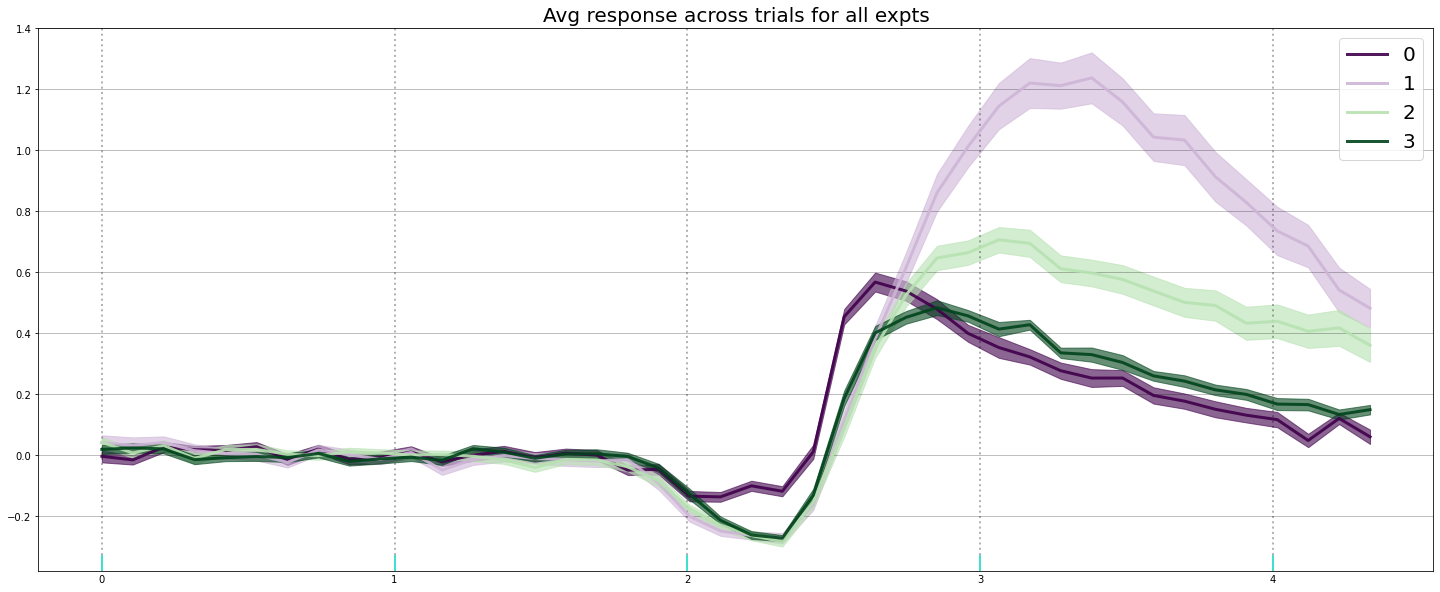

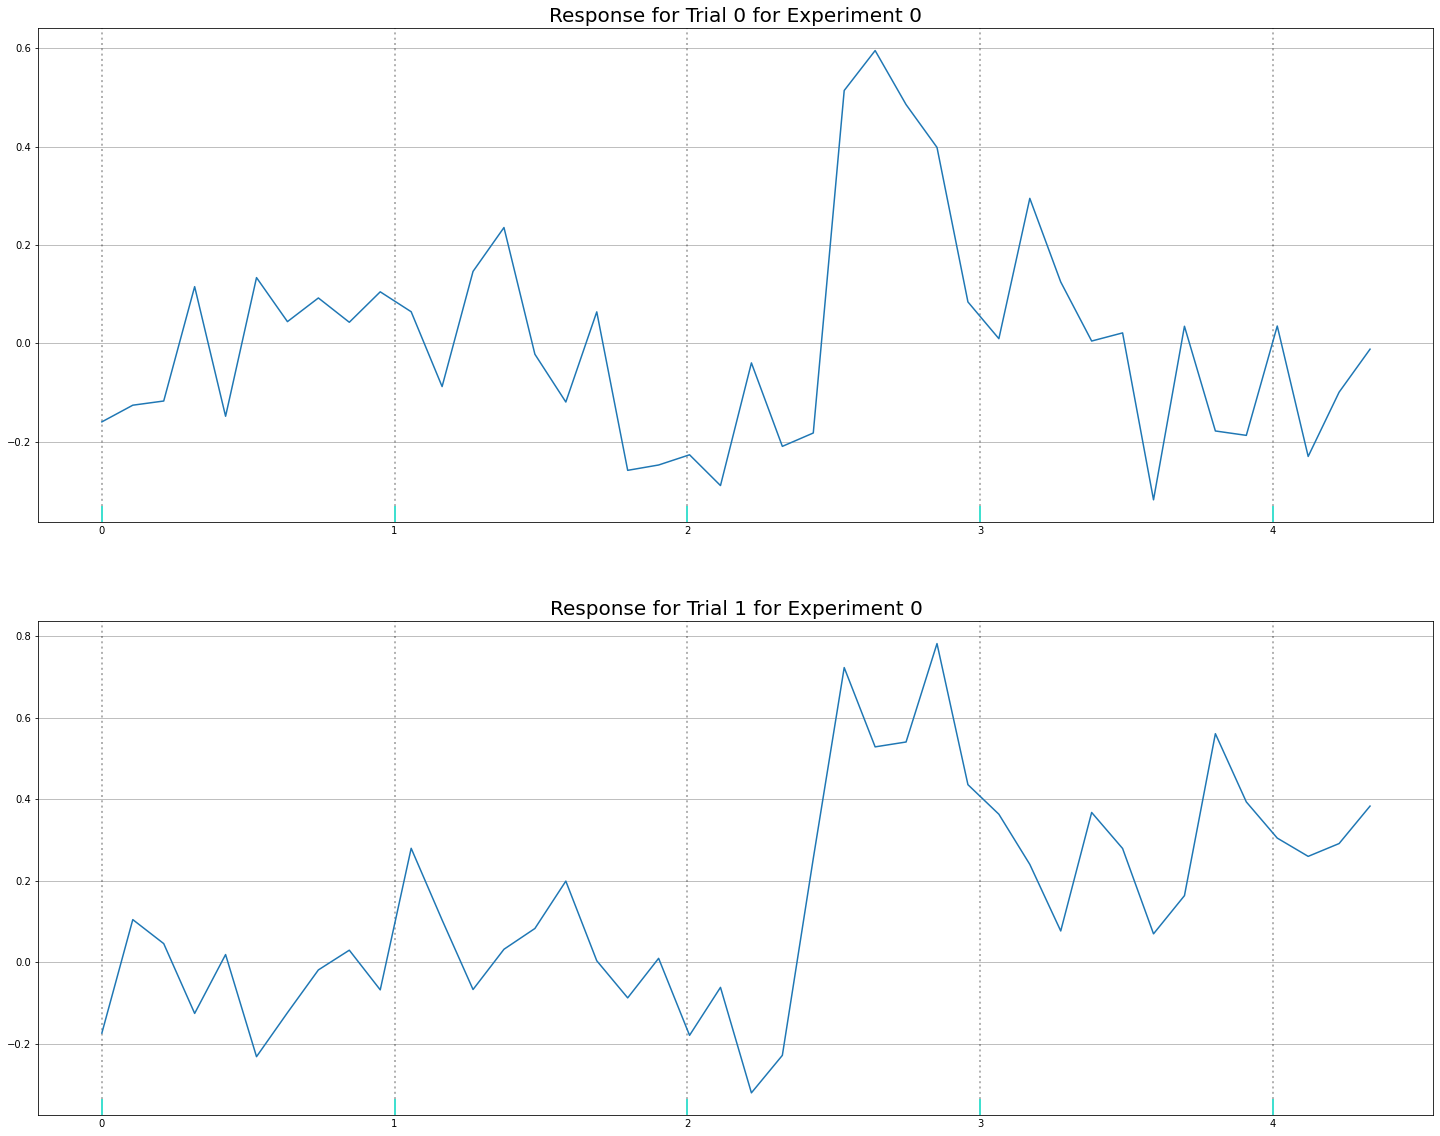

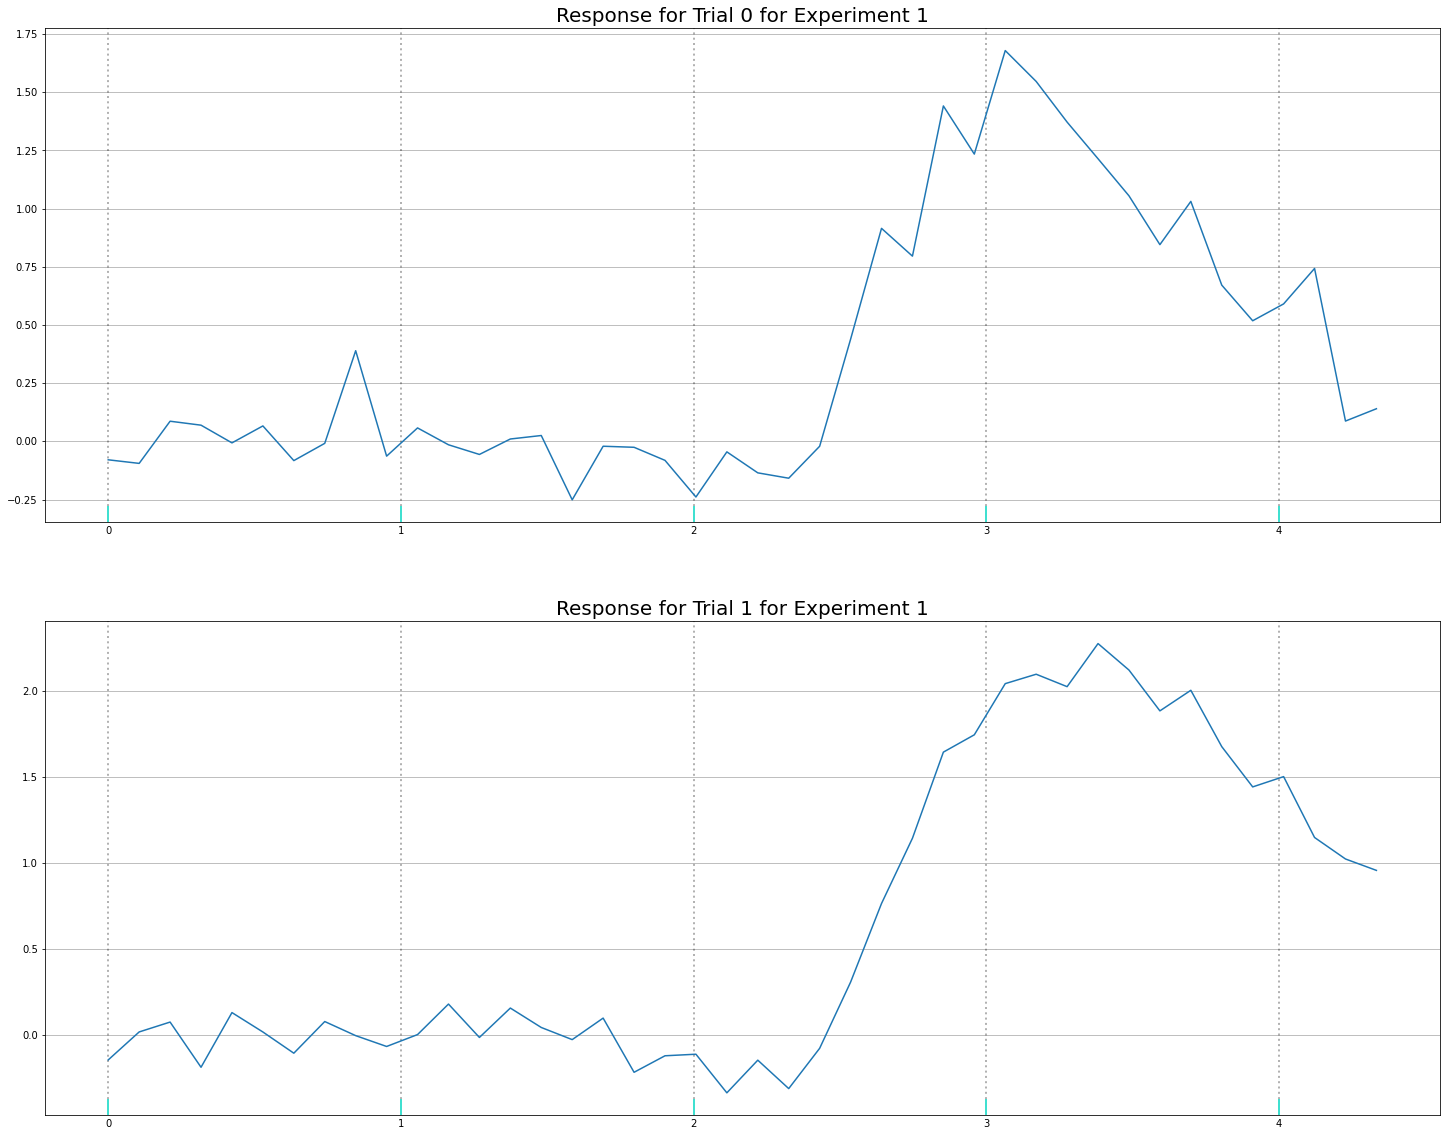

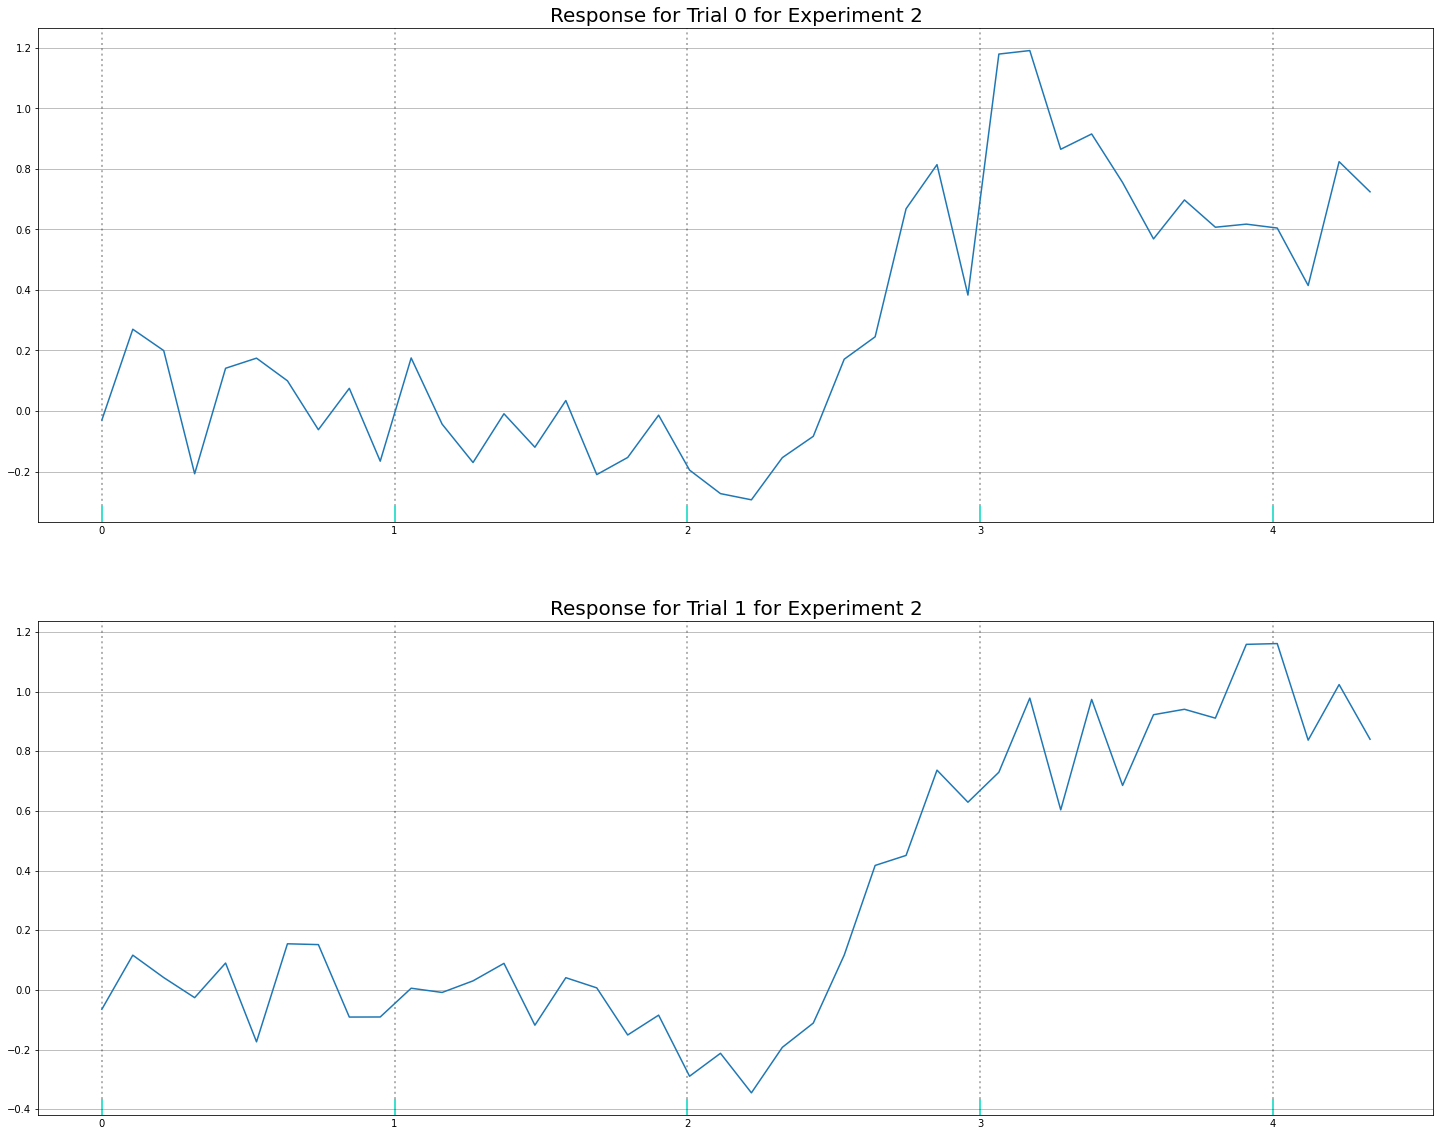

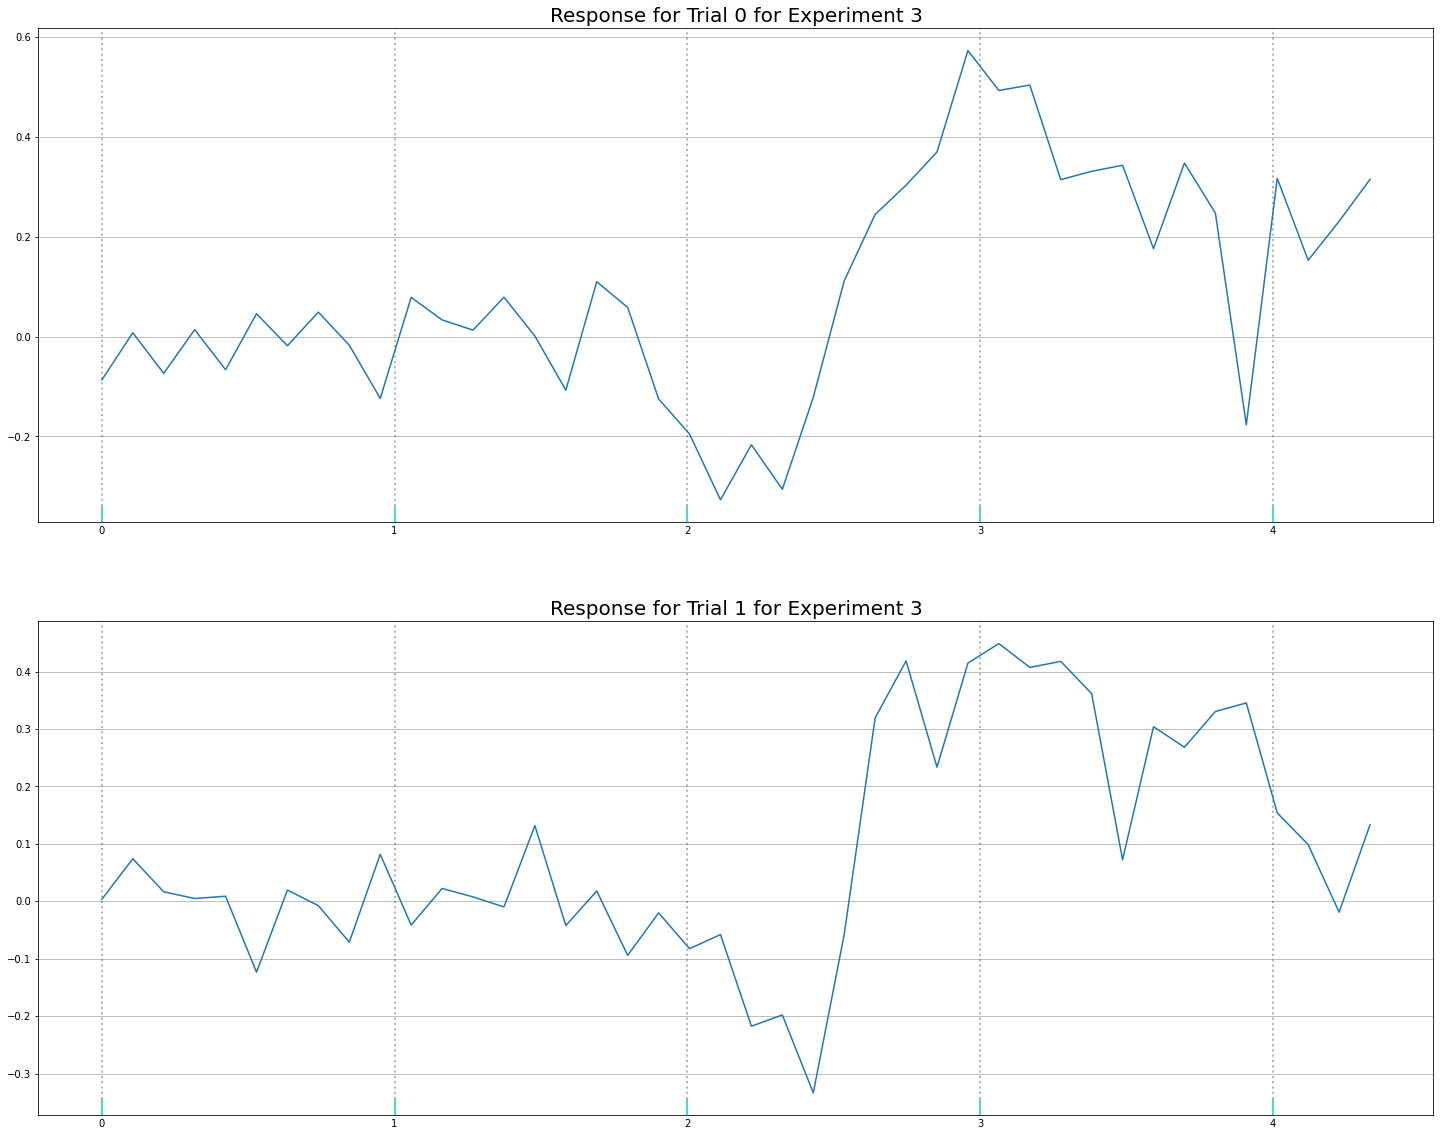

In [391]:
df = False
dff = True
alt_pre_time = 2

perfusionPlots(fly1_expts_dist, 0, trial_count = 2, polarity = 0, savefig = False)

# For looking in on individual experiments



Run Parameters:
{'center': array([0., 0.]), 'height': 240.0, 'idle_color': 0.5, 'intensity': array([1., 0.]), 'num_epochs': 100.0, 'pre_time': 2.0, 'protocol_ID': 'UniformFlash', 'randomize_order': True, 'run_start_time': '16:23:06.50', 'stim_time': 0.5, 'tail_time': 2.0, 'width': 240.0}
Shape of epoch response: (1, 100, 42)


NameError: name 'newFilterTrials' is not defined

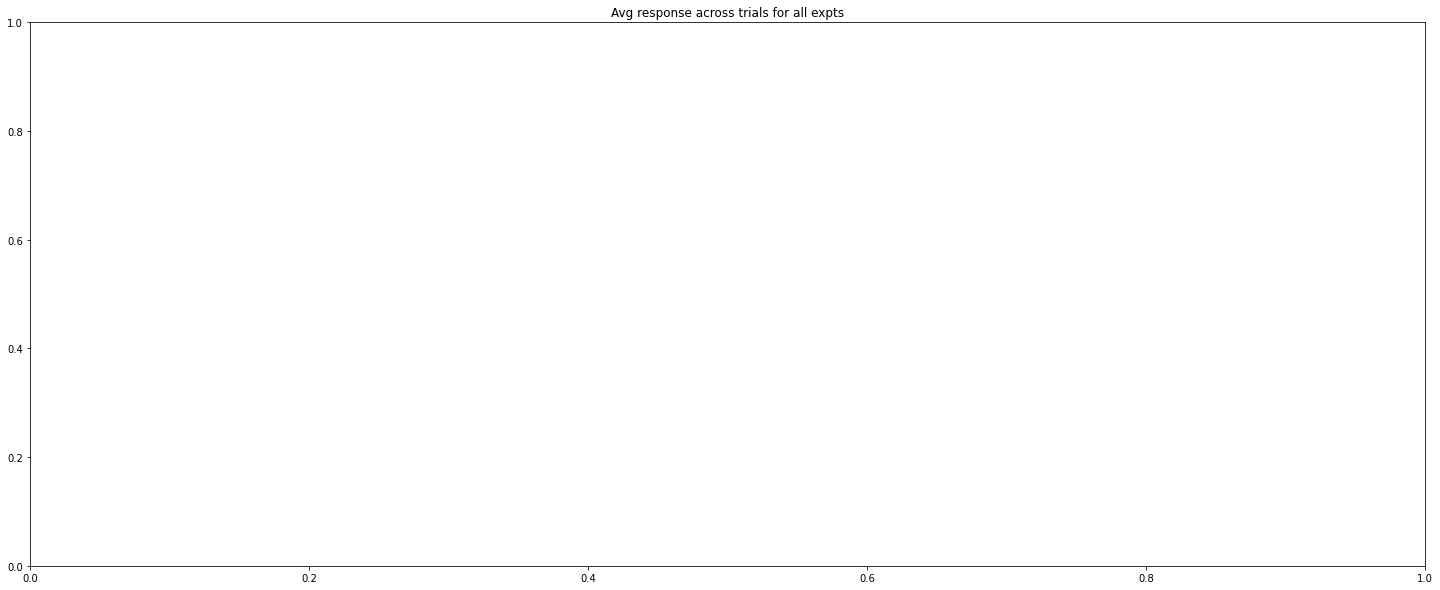

In [26]:
expts = fly4_expts_prox
trial_count = 2
query = 1
which_exp = 3
df = False
dff = True
alt_pre_time = 2
fh_avg, ax_avg = plt.subplots(1, 1, figsize=(25,10))
ax_avg.set_title(f'Avg response across trials for all expts')


file_path = os.path.join(expts[which_exp,0], expts[which_exp,1] + ".hdf5")
ID = imaging_data.ImagingDataObject(file_path, expts[which_exp,2], quiet=True)
roi_data = ID.getRoiResponses(expts[which_exp,3])
roi_number = len(roi_data['roi_response'])

#print(f'Epoch Parameters:\n{ID.getEpochParameters()[5]}')
#print('\n')
#print(f'Run Parameters:\n{ID.getRunParameters()}')
#conditions = np.unique(ID.getEpochParameters(condition_name))
#num_conditions = len(conditions)

# subsets of trials
query = {'current_intensity': query}
time_vector, epoch_response = ma.getAltEpochResponseMatrix(
                                                            ID, np.vstack(roi_data['roi_response']), 
                                                            alt_pre_time=alt_pre_time, dff=dff, df=df,
                                                            )


print('\n')
print(f'Run Parameters:\n{ID.getRunParameters()}')
print(f'Shape of epoch response: {epoch_response.shape}')

#filtered_trials, filtered_ind = shared_analysis.filterTrials(epoch_response[:], ID, query=query, return_inds=True)
filtered_trials, filtered_ind = newFilterTrials(epoch_response[:], ID, query=query, return_inds=True)

len_trial = len(roi_data['time_vector'])
print(f'filtered_trials.shape is {filtered_trials.shape}')
print(f'Length of the trial for exp {1+1}: {len_trial}')
print(f'The number of trials for exp {1+1}: {filtered_trials.shape[1]}\n')

# Plot the epoch response
fh, ax = plt.subplots(trial_count, 1, figsize=(25,trial_count*10))

for trial_ind in range(trial_count):
    ax[trial_ind].plot(time_vector, filtered_trials[0,trial_ind,:])
    ax[trial_ind].set_title(f'Response for Trial {trial_ind} for Experiment {1}')
#    print(f'Epoch Parameters for trial {trial_ind}:\n{ID.getEpochParameters()[trial_ind]}')
# Plot the avg response across trials
#how many trials to avg
mean_across_trials = np.squeeze(np.mean(filtered_trials[:,],1))

#fh, ax = plt.subplots(1, 1, figsize=(25, 10))

ax_avg.plot(time_vector, mean_across_trials, label=str(1))
    
ax_avg.legend()

In [299]:
# Take in filtered trials, output mean and sem
def meanAndSEMTrials(trials):
    squeezed = np.squeeze(trials)
    mean_trials = np.mean(squeezed, axis = 0)
    sem_trials = sem(squeezed)
    sem_plus_trials = mean_trials + sem_trials
    sem_minus_trials = mean_trials - sem_trials
    return mean_trials, sem_plus_trials, sem_minus_trials

In [313]:
expts.shape[0]

4

In [338]:
filtered_ind.shape[0]

50

In [379]:
ID.getRunParameters()

{'center': array([0., 0.]),
 'height': 240.0,
 'idle_color': 0.5,
 'intensity': array([1., 0.]),
 'num_epochs': 100.0,
 'pre_time': 2.0,
 'protocol_ID': 'UniformFlash',
 'randomize_order': True,
 'run_start_time': '16:23:06.50',
 'stim_time': 0.5,
 'tail_time': 2.0,
 'width': 240.0}

In [ ]:
# Function to find mean, min, and max of an epoch response 
# Use getResponseAmplitude function

def perfusionPlots(expts, query_item, trial_count = 2, polarity = None, savefig = False):

    for exp_ind in range(len(expts)):
        print(f'Experiment {exp_ind+1} of {len(expts)}')
        file_path = os.path.join(expts[exp_ind,0], expts[exp_ind,1] + ".hdf5")
        ID = imaging_data.ImagingDataObject(file_path, expts[exp_ind,2], quiet=True)
        roi_data = ID.getRoiResponses(expts[exp_ind,3])

        #print(f'Run Parameters:\n{ID.getRunParameters()}')

        # subsets of trials
        query = {'current_intensity': query_item}
        time_vector, epoch_response = ma.getAltEpochResponseMatrix(
                                                                    ID, np.vstack(roi_data['roi_response']), 
                                                                    alt_pre_time=alt_pre_time, dff=dff, df=df,
                                                                    )
        print(f'Shape of epoch response: {epoch_response.shape}')
        filtered_trials, filtered_ind = newFilterTrials(epoch_response[:], ID, query=query, return_inds=True)        
        #if polarity is not None:
            #checking to see if the filter worked
            #intensityToInd(ID, filtered_ind, polarity)
        #print(f'out of function filtered_ind:\n{filtered_ind}')
        len_trial = len(roi_data['time_vector'])
        print(f'filtered_trials.shape is {filtered_trials.shape}')
        #print(f'Length of the trial for exp {exp_ind+1}: {len_trial}')
        #print(f'The number of trials for exp {exp_ind+1}: {filtered_trials.shape[1]}\n')

        # Plot the epoch response
        fh, ax = plt.subplots(trial_count, 1, figsize=(25,trial_count*10))

        for trial_ind in range(trial_count):
            ax[trial_ind].plot(time_vector, filtered_trials[0,trial_ind,:])
            ax[trial_ind].set_title(f'Response for Trial {trial_ind} for Experiment {exp_ind}', fontsize=20)        
            ax[trial_ind].grid(axis="x", color="k", alpha=.3, linewidth=2, linestyle=":")
            ax[trial_ind].tick_params(axis="x", direction="in", length=16, width=2, color="turquoise")
            ax[trial_ind].grid(axis="y", color="k", alpha=.5, linewidth=.5)

        if savefig == True:
            fh.savefig(
                    save_directory
                    + "RawTraces."
                    + str(expts[exp_ind,1])
                    + ".Series "
                    + str(expts[exp_ind,2])
                    + "."
                    + str(expts[exp_ind,3])
                    + ".polarity"
                    + str(polarity)
                    + ".pdf",
                    dpi=300,
                )
        # Plot the avg response across trials
        #how many trials to avg
        #fh, ax = plt.subplots(1, 1, figsize=(25, 10))
        mean_across_trials, sem_plus_trials, sem_minus_trials = meanAndSEMTrials(filtered_trials)
        ax_avg.plot(time_vector, mean_across_trials, color=colors[exp_ind], alpha=0.9, linewidth=3, label=str(exp_ind))
        ax_avg.fill_between(time_vector, sem_plus_trials, sem_minus_trials, color=colors[exp_ind], alpha=0.6)

        ax_avg.grid(axis="x", color="k", alpha=.3, linewidth=2, linestyle=":")
        ax_avg.tick_params(axis="x", direction="in", length=16, width=2, color="turquoise")
        ax_avg.grid(axis="y", color="k", alpha=.5, linewidth=.5)


In [42]:
def getFilteredTrialsFromHDF5(file_location, hdf5_name, series_number, roi_name, query_item, silent = True):
    # Get filtered trials from hdf5
    file_path = os.path.join(file_location, hdf5_name + ".hdf5")
    ID = imaging_data.ImagingDataObject(file_path, series_number, quiet=True)
    roi_data = ID.getRoiResponses(roi_name)

    # subsets of trials
    query = {'current_intensity': query_item}
    time_vector, epoch_response = ma.getAltEpochResponseMatrix(
                                                                ID, np.vstack(roi_data['roi_response']), 
                                                                alt_pre_time=alt_pre_time, dff=dff, df=df,
                                                                )

    filtered_trials, filtered_ind = newFilterTrials(epoch_response[:], ID, query=query, return_inds=True)        
    len_trial = len(roi_data['time_vector'])

    if silent == False:
        print(f'Shape of epoch response: {epoch_response.shape}')
        print(f'filtered_trials.shape is {filtered_trials.shape}')

    return time_vector, filtered_trials

In [195]:
def getStatsFromEpochResponse(expts, query_item):
    # Takes expts and query, outputs all_stats list
    all_stats = []

    for exp_ind in range(len(expts)):
        print(f'Experiment {exp_ind+1} of {len(expts)}')
        # First grab the time_vector and epoch_responses
        roi_name = expts[exp_ind,3]
        time_vector, epoch_response = getFilteredTrialsFromHDF5(
            file_location = expts[exp_ind,0],
            hdf5_name = expts[exp_ind,1],
            series_number = expts[exp_ind,2],
            roi_name = expts[exp_ind,3],
            query_item = query_item,
            silent = False
        )

        # Find min, max, mean of epoch_response
        trials_min = np.squeeze(ID.getResponseAmplitude(epoch_response, metric = 'min'))
        #trials_min_min = np.nanmin(trials_min)
        trials_max = np.squeeze(ID.getResponseAmplitude(epoch_response, metric = 'max'))
        #trials_max_mean = np.nanmean(trials_max)
        trials_mean = np.squeeze(ID.getResponseAmplitude(epoch_response, metric = 'mean'))
        #trials_mean_mean = np.nanmean(trials_mean)

        stats_list = [list(range(epoch_response.shape[1])), trials_min, trials_max, trials_mean, query_item, exp_ind, roi_name]
        #print(stats_list)
        all_stats.append(stats_list)

    return all_stats




In [196]:
all_stats_1_prox = getStatsFromEpochResponse(fly1_expts_prox, query_item = 1)

Experiment 1 of 4
Shape of epoch response: (1, 100, 42)
filtered_trials.shape is (1, 50, 42)
Experiment 2 of 4
Shape of epoch response: (1, 100, 42)
filtered_trials.shape is (1, 50, 42)
Experiment 3 of 4
Shape of epoch response: (1, 100, 42)
filtered_trials.shape is (1, 50, 42)
Experiment 4 of 4
Shape of epoch response: (1, 100, 42)
filtered_trials.shape is (1, 50, 42)


In [200]:
all_stats_1_prox[0][0]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

To DF

In [201]:
all_stats_1_prox[0][1]

array([-0.08872276, -0.14449461, -0.19301554, -0.10875591, -0.13824272,
       -0.04633836, -0.19765524, -0.17060629, -0.20548832, -0.11020375,
       -0.15356696, -0.09551523, -0.16473377, -0.21096977, -0.21674529,
       -0.16487822, -0.13437219, -0.25953556, -0.0742975 , -0.33184375,
       -0.17049198, -0.14525596, -0.21314485, -0.1812306 , -0.2430594 ,
       -0.12210396, -0.17815829, -0.1882201 , -0.14164095, -0.22666395,
       -0.15595934, -0.13720127, -0.17821674, -0.11025498, -0.17981481,
       -0.14476214, -0.13973386, -0.15207163, -0.20671017, -0.15911045,
       -0.18881401, -0.17741427, -0.22618626, -0.12386236, -0.21224283,
       -0.18171939, -0.23505046, -0.21378526, -0.23480737, -0.18282427])

In [110]:
statsDF_1_prox = pd.DataFrame(all_stats_1_prox)
statsDF_1_prox.columns=['Trial_Number', 'Trial_Min', 'Trial_Max', 'Trial_Mean', 'Query_Item', 'Exp_Ind', 'ROI_Name']

In [111]:
stats_prox = [statsDF_0_prox, statsDF_1_prox]
statsDF_prox = pd.concat(stats_prox)

df = statsDF_prox.reset_index(drop=True)

,Trial_Number,Trial_Min,Trial_Max,Trial_Mean,Query_Item,Exp_Ind,ROI_Name
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.21175717963692262, -0.21722054994614737, ...","[[0.2571291432239996, 0.3619914916311575, 0.38...","[[0.021605038612288647, 0.12510040678191253, 0...",0,0,proximal
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.5727874019063517, -0.24416287173406956, -...","[[-0.04972285085970309, 1.2928402886118524, 1....","[[-0.2928737475863113, 0.6828339590719245, 0.5...",0,1,proximal
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.43827227925141016, -0.2716102115588184, -...","[[1.3679219008099597, 2.0329073653288505, 1.70...","[[0.6623061251569907, 0.9430673019579707, 0.75...",0,2,proximal
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.4248542282941066, -0.33307996147429086, -...","[[0.7821765358057302, 0.8543465965966318, 1.50...","[[0.18410888246375787, 0.3014317087723129, 0.6...",0,3,proximal
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.08872275981256189, -0.14449461017294948, ...","[[0.278493427544107, 0.21810910406830117, 0.31...","[[0.08727465687661255, 0.0138941528362397, 0.0...",1,0,proximal
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.12057976019140818, -0.19703909528944524, ...","[[0.9625656676464355, 0.9530725781204082, 1.30...","[[0.2103435631059738, 0.17320740037256457, 0.3...",1,1,proximal
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.38730266713503403, -0.4933994024961708, -...","[[1.7840033473188255, 1.4465071048361415, 2.14...","[[0.28719923186748425, 0.1298799937317703, 0.4...",1,2,proximal
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.36016577506121245, -0.2837461055804427, -...","[[1.259574453683001, 1.513570347538705, 1.5676...","[[0.1817868866370995, 0.3198727981513777, 0.32...",1,3,proximal


In [113]:
statsDF_prox['Trial_Min']

0    [[-0.21175717963692262, -0.21722054994614737, ...
1    [[-0.5727874019063517, -0.24416287173406956, -...
2    [[-0.43827227925141016, -0.2716102115588184, -...
3    [[-0.4248542282941066, -0.33307996147429086, -...
0    [[-0.08872275981256189, -0.14449461017294948, ...
1    [[-0.12057976019140818, -0.19703909528944524, ...
2    [[-0.38730266713503403, -0.4933994024961708, -...
3    [[-0.36016577506121245, -0.2837461055804427, -...
Name: Trial_Min, dtype: object

In [115]:
statsDF_prox.Trial_Min

0    [[-0.21175717963692262, -0.21722054994614737, ...
1    [[-0.5727874019063517, -0.24416287173406956, -...
2    [[-0.43827227925141016, -0.2716102115588184, -...
3    [[-0.4248542282941066, -0.33307996147429086, -...
0    [[-0.08872275981256189, -0.14449461017294948, ...
1    [[-0.12057976019140818, -0.19703909528944524, ...
2    [[-0.38730266713503403, -0.4933994024961708, -...
3    [[-0.36016577506121245, -0.2837461055804427, -...
Name: Trial_Min, dtype: object

In [118]:
df

,Trial_Number,Trial_Min,Trial_Max,Trial_Mean,Query_Item,Exp_Ind,ROI_Name
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.21175717963692262, -0.21722054994614737, ...","[[0.2571291432239996, 0.3619914916311575, 0.38...","[[0.021605038612288647, 0.12510040678191253, 0...",0,0,proximal
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.5727874019063517, -0.24416287173406956, -...","[[-0.04972285085970309, 1.2928402886118524, 1....","[[-0.2928737475863113, 0.6828339590719245, 0.5...",0,1,proximal
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.43827227925141016, -0.2716102115588184, -...","[[1.3679219008099597, 2.0329073653288505, 1.70...","[[0.6623061251569907, 0.9430673019579707, 0.75...",0,2,proximal
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.4248542282941066, -0.33307996147429086, -...","[[0.7821765358057302, 0.8543465965966318, 1.50...","[[0.18410888246375787, 0.3014317087723129, 0.6...",0,3,proximal
4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.08872275981256189, -0.14449461017294948, ...","[[0.278493427544107, 0.21810910406830117, 0.31...","[[0.08727465687661255, 0.0138941528362397, 0.0...",1,0,proximal
5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.12057976019140818, -0.19703909528944524, ...","[[0.9625656676464355, 0.9530725781204082, 1.30...","[[0.2103435631059738, 0.17320740037256457, 0.3...",1,1,proximal
6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.38730266713503403, -0.4933994024961708, -...","[[1.7840033473188255, 1.4465071048361415, 2.14...","[[0.28719923186748425, 0.1298799937317703, 0.4...",1,2,proximal
7,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.36016577506121245, -0.2837461055804427, -...","[[1.259574453683001, 1.513570347538705, 1.5676...","[[0.1817868866370995, 0.3198727981513777, 0.32...",1,3,proximal


In [141]:
zero_query = df[df.Query_Item==0]
one_query = df[df.Query_Item==1]

InvalidIndexError: (0     True
1     True
2     True
3     True
4    False
5    False
6    False
7    False
Name: Query_Item, dtype: bool, 0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
Name: Exp_Ind, dtype: bool)

# Some indexing tricks below

In [150]:
# Use parentheses and boolean operators to get multiple subsets of data
# can use | (or), & (and), ~ (not) https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
query0_exp0 = df[(df.Query_Item==0) & (df.Exp_Ind==0)]
query1_exp0 = df[(df.Query_Item==1) & (df.Exp_Ind==0)]
query1_exp1 = df[(df.Query_Item==1) & (df.Exp_Ind==1)]
query1_exp2 = df[(df.Query_Item==1) & (df.Exp_Ind==2)]
query1_exp3 = df[(df.Query_Item==1) & (df.Exp_Ind==3)]

In [187]:
query0_exp0.Trial_Number[0]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [189]:
query0_exp0.loc['Trial_Number'] = np.array(query0_exp0.Trial_Number[0])

test

ValueError: cannot set a row with mismatched columns

<AxesSubplot:>

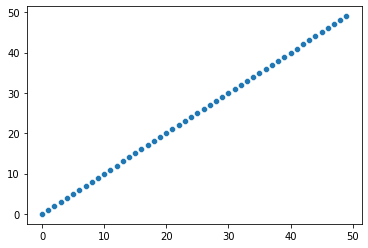

In [192]:
sns.scatterplot(x = np.array(df.Trial_Number[0]), y = np.array(df.Trial_Number[0]))